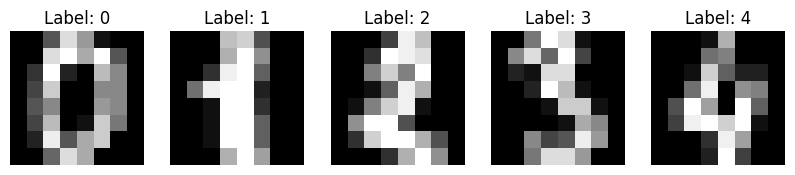

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Visualize few digits
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))


Baseline Accuracy: 0.9611111111111111


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.95      1.00      0.97        36
           8       0.94      0.89      0.91        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

